In [8]:
using Plots
using Polynomials
using DataFrames
using Interpolations

INFO: Recompiling stale cache file /home/artur/.julia/lib/v0.6/Interpolations.ji for module Interpolations.


In [37]:
# Os X
ox = 1:0.02:10
# Wezly
knots = 1:1:10
A = [rand() for x in knots]

10-element Array{Float64,1}:
 0.0363835
 0.920407 
 0.898821 
 0.572089 
 0.411185 
 0.174631 
 0.147227 
 0.740862 
 0.201543 
 0.148052 

In [38]:
#Zapisanie do pliku wykresu z węzłami
p0 = scatter(xs, A, label="data points")
savefig(p0, "points.png")

In [39]:
# Interpolacja Lagrange'a
function lagrange_interpolation(knots, A)   
    n = size(A,1)
    P = Poly([0])
    for i = 1:n
        l = Poly([1.0])
        # Obliczanie współczynnika L_i
        for j = 1:n
            if i != j
                l = l * poly([knots[j]]) / (knots[i] - knots[j])
            end
        end            
        P += (l * A[i])
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

In [46]:
lagrange = lagrange_interpolation(knots, A)
ys = [lagrange(x) for x in ox]
p1 = scatter(knots, A, label="data points")
plot!(ox, ys, color=:green, label="lagrange interpolation")
savefig(p1, "lagrange.png")

In [62]:
# Metoda newtona
function newton_interpolation(knots, A, n)
    if n == 1
        Poly(float(A[1]))
    else
        q = 1
        prev = newton_interpolation(knots, A, n-1)
        p = A[n] - polyval(prev, knots[n])
        for i = 1:n-1
            q = q * (knots[n] - knots[i])
        end        
        poly([knots[i] for i in 1:n-1]) * (p / q) + prev
    end
end

newton_interpolation (generic function with 2 methods)

In [66]:
newton = newton_interpolation(knots, A)
ys = [newton(x) for x in ox]
p2 = scatter(knots, A, label="data points")
plot!(ox, ys, color=:red, label="newton interpolation")
savefig(p2, "newton.png")

451-element Array{Float64,1}:
 0.0363835
 0.0366184
 0.0368281
 0.0370141
 0.037178 
 0.0373213
 0.0374455
 0.0375517
 0.0376414
 0.0377157
 0.0377759
 0.0378229
 0.0378579
 ⋮        
 0.0938321
 0.0976508
 0.101666 
 0.105886 
 0.110318 
 0.114972 
 0.119856 
 0.124979 
 0.13035  
 0.135979 
 0.141877 
 0.148052 

In [64]:
# Pakiet Polynomials
polynom = polyfit(knots, A)
ys = [polynom(x) for x in ox]
p3 = scatter(knots, A, label="data points")
plot!(ox, ys, color=:black, label="polyfit interpolation")
savefig(p3, "polynomial.png")

In [70]:
# Funkcje sklejane
cubic = CubicSplineInterpolation(knots, A)

cubicy = [cubic(x) for x in ox]
lagrangey = [lagrange(x) for x in ox]
p5 = scatter(xs, A, label="data points", legend=:topright)
plot!(ox, cubicy, color=:green, label="cubic spline")
plot!(ox, lagrangey, color=:blue, label="newton")
savefig(p5, "p6.png")


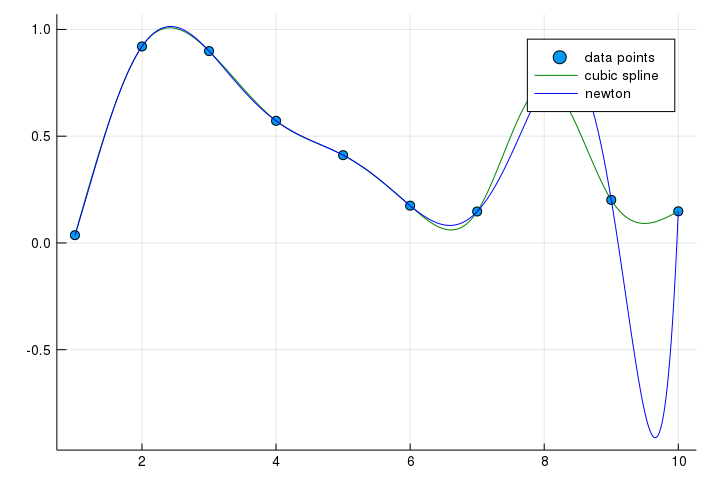

In [71]:
# Efekt Rungego
plot!(dpi = 120, size = (600,400), fmt = :png)